# Building dataframe


Import needed library for learning model

In [115]:
import pandas as pd 
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

from sklearn.preprocessing import LabelEncoder
from sklearn import metrics
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.metrics import r2_score


Build dataframe for training set

In [116]:
dataframe = pd.read_csv('C:\\Users\\LamPhuss\\Code\\Python\\ML_Projects-main\\cleaned_data.csv')
dataframe.head()

,car_price,car_title,car_sub_title,car_attention_grabber,car_seller,car_seller_rating,car_seller_location,year,reg,engine_size,...,miles_traveled,power,service,warranty,first_year_tax,accident_type,new_brand,approve_used,finance,title
0,89995,AC Cobra,4.9 MK IV CRS 2dr,GENUINE AC COBRA CRS 522 BHP,Private seller,NaN,watford,2001.0,X,4.9L,...,14400.0,167.7825,UnKnown,0,0,UnKnown,0,0,0,AC Cobra 4.9 MK IV CRS 2dr
1,92500,AC Cobra,378 - MkIV,PHYSICAL CAR!,Boss Motor Company Limited,5.0,chesham,2019.0,T,NaN,...,650.0,NaN,UnKnown,0,0,UnKnown,0,0,0,AC Cobra 378 - MkIV
2,109995,AC Cobra,MK1V 212 SC. 3.5 V8 350 BHP LOTUS TWIN TURBO. ...,FULL CARBON FIBRE BODY.,PREMIER GT LIMITED,4.8,pulborough,2000.0,X,3.5L,...,21600.0,NaN,UnKnown,0,0,UnKnown,0,0,0,AC Cobra MK1V 212 SC. 3.5 V8 350 BHP LOTUS TWI...
3,124950,AC Cobra,302 MKIV 2dr,ABSOLUTELY STUNNING,TOP 555 LIMITED,5.0,oakham,1989.0,F,NaN,...,2750.0,NaN,UnKnown,0,0,UnKnown,0,0,0,AC Cobra 302 MKIV 2dr
4,124950,AC Cobra,302 MKIV With Factory Lightweight Engine 5.0 2dr,'STAGE 3' SVO ENGINE,TOP 555 LIMITED,5.0,oakham,1989.0,E,5.0L,...,15142.0,NaN,UnKnown,0,0,UnKnown,0,0,0,AC Cobra 302 MKIV With Factory Lightweight Eng...


# Data Analysis and Preprocessing

## Check collumns and shapes in dataframe

In [117]:
dataframe.columns

Index(['car_price', 'car_title', 'car_sub_title', 'car_attention_grabber',
       'car_seller', 'car_seller_rating', 'car_seller_location', 'year', 'reg',
       'engine_size', 'transmission', 'ulez', 'full_dealership', 'discounted',
       'fuel_type', 'car_type', 'num_owners', 'miles_traveled', 'power',
       'service', 'warranty', 'first_year_tax', 'accident_type', 'new_brand',
       'approve_used', 'finance', 'title'],
      dtype='object')

we can drop "Customer_Id" column since it does not affect the price.

In [ ]:
dataframe.drop('Customer_Id', axis=1, inplace=True)

In [50]:
print("There are " + str(dataframe.shape[0]) + " rows and " + str(dataframe.shape[1]) + " columns")

There are 818456 rows and 27 columns


## Describe some basic statistical values

In [119]:
dataframe.describe()

,car_price,car_seller_rating,year,ulez,full_dealership,discounted,num_owners,miles_traveled,power,warranty,first_year_tax,new_brand,approve_used,finance
count,8.184560e+05,644191.000000,747436.000000,818456.000000,818456.000000,818456.000000,442596.000000,763847.000000,814375.000000,818456.000000,818456.000000,818456.000000,818456.000000,818456.000000
mean,2.011859e+04,4.649465,2015.974279,0.815449,0.035079,6.957739,2.097290,48726.666861,125.379807,0.063693,0.063693,0.066233,0.146940,0.716983
std,2.224110e+04,0.433626,4.346820,0.387933,0.183981,66.422946,1.265622,36522.828455,67.822551,0.244206,0.244206,0.248690,0.354046,0.450465
min,3.000000e+02,1.000000,1934.000000,0.000000,0.000000,0.000000,1.000000,1.000000,0.745700,0.000000,0.000000,0.000000,0.000000,0.000000
25%,8.990000e+03,4.600000,2014.000000,1.000000,0.000000,0.000000,1.000000,19431.000000,84.582500,0.000000,0.000000,0.000000,0.000000,0.000000
50%,1.500000e+04,4.700000,2017.000000,1.000000,0.000000,0.000000,2.000000,40254.000000,110.325000,0.000000,0.000000,0.000000,0.000000,1.000000
75%,2.450000e+04,4.900000,2019.000000,1.000000,0.000000,0.000000,3.000000,71200.000000,139.745000,0.000000,0.000000,0.000000,0.000000,1.000000
max,3.199830e+06,5.000000,2022.000000,1.000000,1.000000,998.000000,32.000000,999999.000000,1834.422000,1.000000,1.000000,1.000000,1.000000,1.000000


## Describe summary of data frame 

In [120]:
dataframe.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 818456 entries, 0 to 818455
Data columns (total 27 columns):
 #   Column                 Non-Null Count   Dtype  
---  ------                 --------------   -----  
 0   car_price              818456 non-null  int64  
 1   car_title              818456 non-null  object 
 2   car_sub_title          817909 non-null  object 
 3   car_attention_grabber  738163 non-null  object 
 4   car_seller             818348 non-null  object 
 5   car_seller_rating      644191 non-null  float64
 6   car_seller_location    816256 non-null  object 
 7   year                   747436 non-null  float64
 8   reg                    747436 non-null  object 
 9   engine_size            803010 non-null  object 
 10  transmission           818243 non-null  object 
 11  ulez                   818456 non-null  int64  
 12  full_dealership        818456 non-null  int64  
 13  discounted             818456 non-null  float64
 14  fuel_type              818234 non-nu

## Handle missing value

Get all columns that have missing values

In [121]:
dataframe.columns[dataframe.isna().any()].tolist()

['car_sub_title',
 'car_attention_grabber',
 'car_seller',
 'car_seller_rating',
 'car_seller_location',
 'year',
 'reg',
 'engine_size',
 'transmission',
 'fuel_type',
 'car_type',
 'num_owners',
 'miles_traveled',
 'power',
 'title']

In [122]:
train_missings = dataframe.filter(
['car_sub_title',
 'car_attention_grabber',
 'car_seller',
 'car_seller_rating',
 'car_seller_location',
 'year',
 'reg',
 'engine_size',
 'transmission',
 'fuel_type',
 'car_type',
 'num_owners',
 'miles_traveled',
 'power',
 'title'],axis=1)

In [123]:
print("Missing-value rate of train data:")
mis_val_train = train_missings.isnull().sum() / len(train_missings) * 100
print(mis_val_train)

Missing-value rate of train data:
car_sub_title             0.066833
car_attention_grabber     9.810301
car_seller                0.013196
car_seller_rating        21.291920
car_seller_location       0.268799
year                      8.677314
reg                       8.677314
engine_size               1.887212
transmission              0.026025
fuel_type                 0.027124
car_type                  0.086993
num_owners               45.923055
miles_traveled            6.672197
power                     0.498622
title                     0.066833
dtype: float64


In [124]:
dataframef= dataframe.assign(title = dataframe['car_title'] + " " + dataframe['car_sub_title'] if not dataframe['car_sub_title'].empty else dataframe['car_title'])
dataframe.drop(['car_sub_title'], axis=1, inplace=True)

dataframe['year'] = dataframe.groupby('car_title')['year'].transform(lambda x: x.fillna(int(x.mode()[0])) if not x.mode().empty else None)
dataframe['reg'] = dataframe.groupby('car_title')['reg'].transform(lambda x: x.fillna(x.mode()[0]) if not x.mode().empty else None)
dataframe['car_attention_grabber'] = dataframe.groupby('car_title')['car_attention_grabber'].transform(lambda x: x.fillna(x.mode()[0]) if not x.mode().empty else None)
dataframe['engine_size'] = dataframe.groupby('car_title')['engine_size'].transform(lambda x: x.fillna(x.mode()[0]) if not x.mode().empty else None)
dataframe['car_seller_rating'] = dataframe.groupby('title')['car_seller_rating'].transform(lambda x: x.fillna(x.mode()[0]) if not x.mode().empty else None)

dataframe.dropna(subset=['miles_traveled', 'car_seller_rating', 'engine_size', 'power', 'car_seller_location',
                  'year', 'reg', 'car_type', 'car_attention_grabber', 'fuel_type', 'transmission', 'car_seller'],
          inplace=True)

In [125]:
dataframe.drop(['title', 'num_owners'], axis=1, inplace=True)

Checking missing data again

In [126]:
print("Number of columns that have NaN values are : " + str(len(dataframe.columns[dataframe.isna().any()].tolist())))

Number of columns that have NaN values are : 0


All NaN values have been handled ,so we have done this step

In [127]:
dataframe.shape

(710026, 24)

## Handling outliers

In [128]:
train_outliers=dataframe.select_dtypes(include=['int', 'float'])

train_outliers.head()


,car_price,car_seller_rating,year,ulez,full_dealership,discounted,miles_traveled,power,warranty,first_year_tax,new_brand,approve_used,finance
8,24275,5.0,2019.0,1,0,0.0,10313.0,124.5319,0,0,0,1,1
9,24275,5.0,2019.0,1,0,0.0,10313.0,124.5319,0,0,0,1,1
11,15649,4.7,2018.0,1,0,0.0,28692.0,125.2776,0,0,0,0,1
12,15995,5.0,2017.0,1,0,0.0,44000.0,125.0350,0,0,0,0,1
13,16195,4.6,2018.0,1,0,0.0,58000.0,125.0350,0,0,0,0,1


In [129]:
dataframe.select_dtypes(include=['int', 'float']).columns.tolist()


['car_price',
 'car_seller_rating',
 'year',
 'ulez',
 'full_dealership',
 'discounted',
 'miles_traveled',
 'power',
 'warranty',
 'first_year_tax',
 'new_brand',
 'approve_used',
 'finance']

In [130]:
train_outliers = dataframe.filter( ['car_price',
 'car_seller_rating',
 'year',
 'ulez',
 'full_dealership',
 'discounted',
 'miles_traveled',
 'power',
 'warranty',
 'first_year_tax',
 'new_brand',
 'approve_used',
 'finance'],axis=1)

In [131]:
for col in train_outliers:
    q1 = train_outliers[col].quantile(0.25)
    q3 = train_outliers[col].quantile(0.75)
    iqr = q3 - q1
    range_low = q1 - 1.5 * iqr
    range_high = q3 + 1.5 * iqr
    outliers = dataframe[(dataframe[col] < range_low) | (dataframe[col] > range_high)]
    print("NUmber of outliers in " + str(col) + " is : " + str(len(outliers)))
    

NUmber of outliers in car_price is : 45054
NUmber of outliers in car_seller_rating is : 54602
NUmber of outliers in year is : 18811
NUmber of outliers in ulez is : 121608
NUmber of outliers in full_dealership is : 27806
NUmber of outliers in discounted is : 0
NUmber of outliers in miles_traveled is : 8337
NUmber of outliers in power is : 54812
NUmber of outliers in warranty is : 0
NUmber of outliers in first_year_tax is : 0
NUmber of outliers in new_brand is : 0
NUmber of outliers in approve_used is : 112460
NUmber of outliers in finance is : 160534


Display the distribution of values in each column of a dataset and highlight outliers by boxplot chart

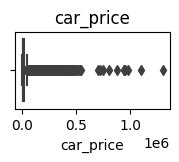

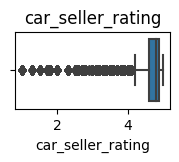

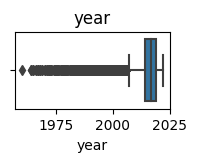

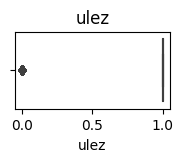

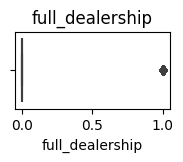

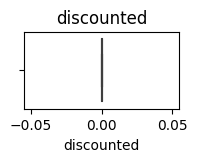

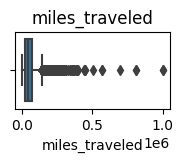

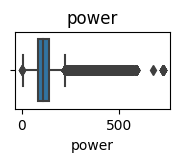

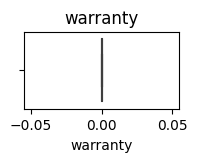

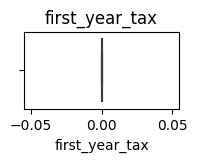

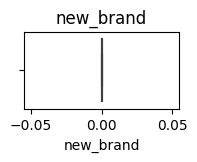

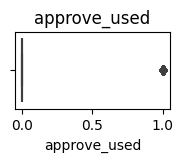

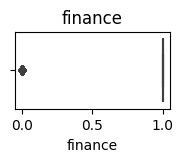

In [132]:

for col in train_outliers:
    plt.figure(figsize=(2,1))
    sns.boxplot(x=dataframe[col], whis=1.5)
    plt.title(col)
    plt.show()

Replace all outliers

In [133]:
for col in train_outliers:
    q1 = train_outliers[col].quantile(0.25)
    q3 = train_outliers[col].quantile(0.75)
    iqr = q3 - q1
    range_low = q1 - 1.5 * iqr
    range_high = q3 + 1.5 * iqr
    dataframe = dataframe[(dataframe[col] >= range_low) & (dataframe[col] <= range_high)]
    outliers = dataframe[(dataframe[col] < range_low) | (dataframe[col] > range_high)]
    print("NUmber of outliers in " + str(col) + " is : " + str(len(outliers)))

NUmber of outliers in car_price is : 0
NUmber of outliers in car_seller_rating is : 0
NUmber of outliers in year is : 0
NUmber of outliers in ulez is : 0
NUmber of outliers in full_dealership is : 0
NUmber of outliers in discounted is : 0
NUmber of outliers in miles_traveled is : 0
NUmber of outliers in power is : 0
NUmber of outliers in warranty is : 0
NUmber of outliers in first_year_tax is : 0
NUmber of outliers in new_brand is : 0
NUmber of outliers in approve_used is : 0
NUmber of outliers in finance is : 0


Display the distribution of values in each column of a dataset and highlight outliers by boxplot chart after replaced all outliers

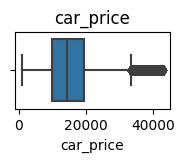

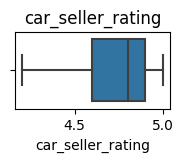

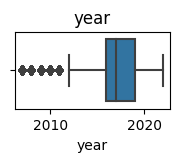

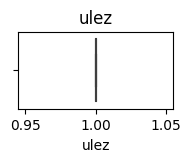

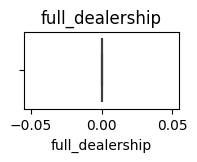

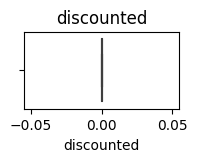

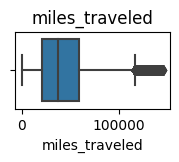

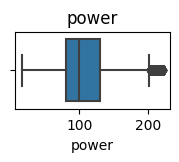

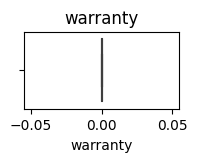

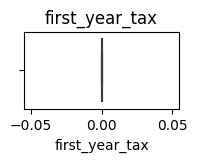

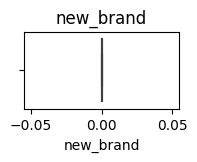

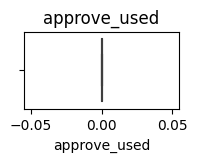

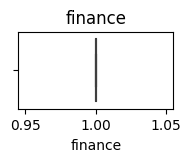

In [134]:
for col in train_outliers:
    plt.figure(figsize=(2,1))
    sns.boxplot(x=dataframe[col], whis=1.5)
    plt.title(col)
    plt.show()

In [135]:
dataframe.shape

(312627, 24)

## Encoding labels

Get all columns that contain object-type values

In [136]:
encoding_col = dataframe.select_dtypes(include='object')
encoding_col.info()

<class 'pandas.core.frame.DataFrame'>
Index: 312627 entries, 11 to 817773
Data columns (total 11 columns):
 #   Column                 Non-Null Count   Dtype 
---  ------                 --------------   ----- 
 0   car_title              312627 non-null  object
 1   car_attention_grabber  312627 non-null  object
 2   car_seller             312627 non-null  object
 3   car_seller_location    312627 non-null  object
 4   reg                    312627 non-null  object
 5   engine_size            312627 non-null  object
 6   transmission           312627 non-null  object
 7   fuel_type              312627 non-null  object
 8   car_type               312627 non-null  object
 9   service                312627 non-null  object
 10  accident_type          312627 non-null  object
dtypes: object(11)
memory usage: 28.6+ MB


Encoding all object-type then recheck

In [137]:
le = LabelEncoder()
for col in encoding_col:
    le.fit(encoding_col[col].astype(str))
    dataframe[col] = le.transform(encoding_col[col].astype(str))
dataframe.info()



<class 'pandas.core.frame.DataFrame'>
Index: 312627 entries, 11 to 817773
Data columns (total 24 columns):
 #   Column                 Non-Null Count   Dtype  
---  ------                 --------------   -----  
 0   car_price              312627 non-null  int64  
 1   car_title              312627 non-null  int32  
 2   car_attention_grabber  312627 non-null  int32  
 3   car_seller             312627 non-null  int32  
 4   car_seller_rating      312627 non-null  float64
 5   car_seller_location    312627 non-null  int32  
 6   year                   312627 non-null  float64
 7   reg                    312627 non-null  int32  
 8   engine_size            312627 non-null  int32  
 9   transmission           312627 non-null  int32  
 10  ulez                   312627 non-null  int64  
 11  full_dealership        312627 non-null  int64  
 12  discounted             312627 non-null  float64
 13  fuel_type              312627 non-null  int32  
 14  car_type               312627 non-null  

In [138]:
dataframe.info()

<class 'pandas.core.frame.DataFrame'>
Index: 312627 entries, 11 to 817773
Data columns (total 24 columns):
 #   Column                 Non-Null Count   Dtype  
---  ------                 --------------   -----  
 0   car_price              312627 non-null  int64  
 1   car_title              312627 non-null  int32  
 2   car_attention_grabber  312627 non-null  int32  
 3   car_seller             312627 non-null  int32  
 4   car_seller_rating      312627 non-null  float64
 5   car_seller_location    312627 non-null  int32  
 6   year                   312627 non-null  float64
 7   reg                    312627 non-null  int32  
 8   engine_size            312627 non-null  int32  
 9   transmission           312627 non-null  int32  
 10  ulez                   312627 non-null  int64  
 11  full_dealership        312627 non-null  int64  
 12  discounted             312627 non-null  float64
 13  fuel_type              312627 non-null  int32  
 14  car_type               312627 non-null  

## Choose appopriate columns

Fetching heatmap figure

Text(0.5, 1.0, 'Correlation between the columns')

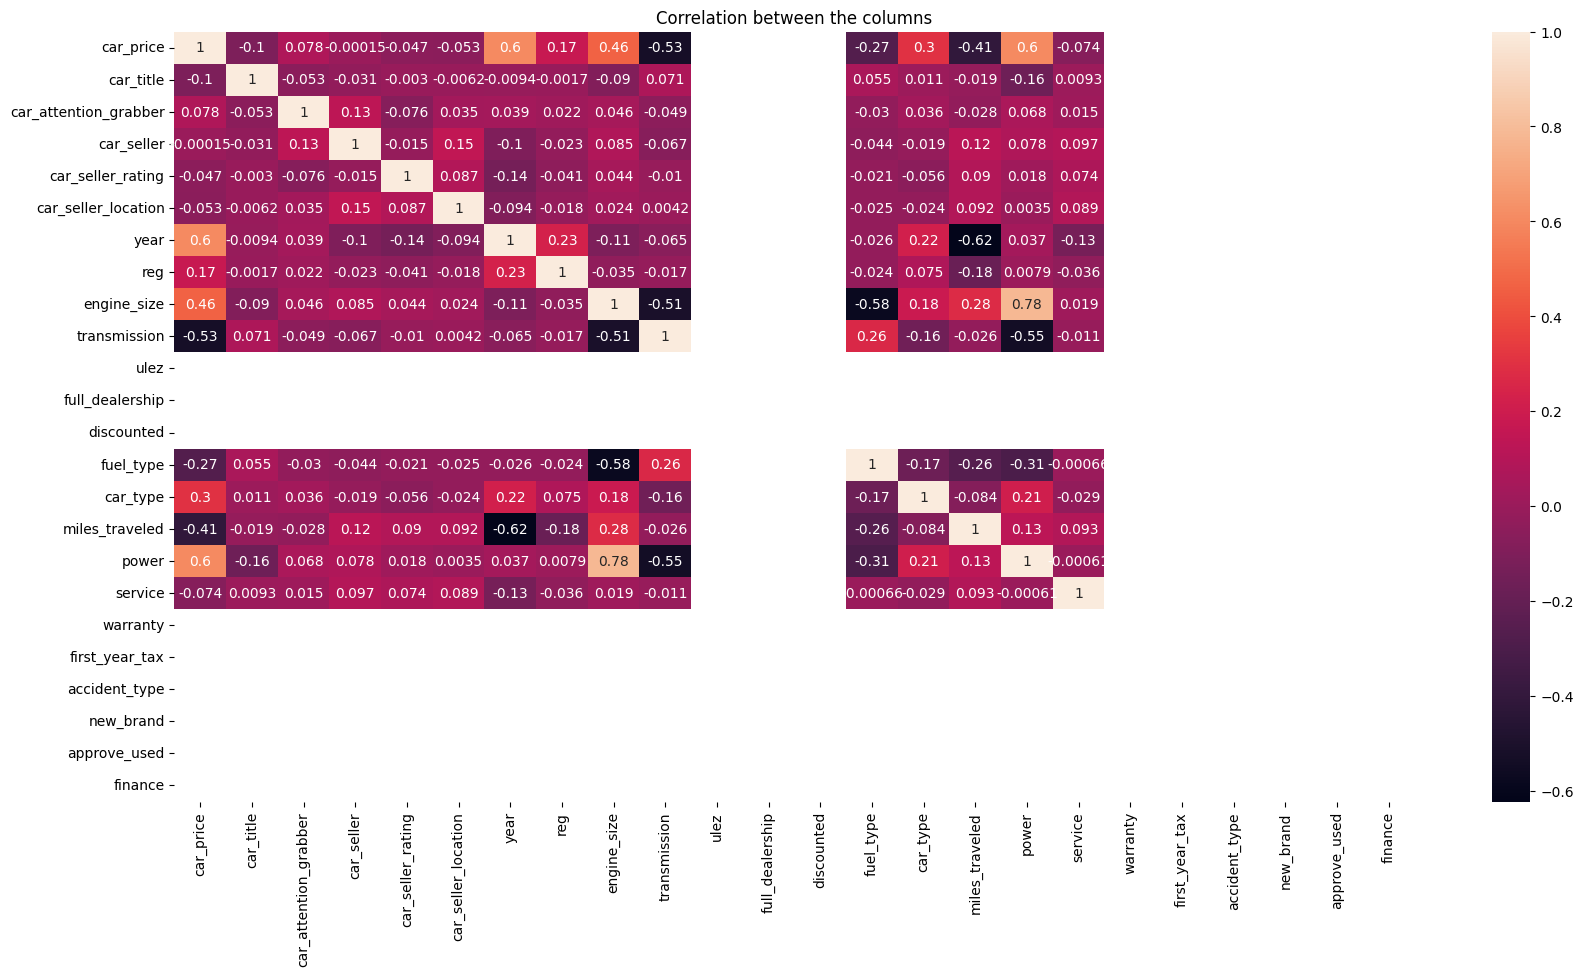

In [139]:
plt.figure(figsize=(20,10))
sns.heatmap(dataframe.corr(),annot=True)
plt.title("Correlation between the columns")

In [140]:
corr_matrix = dataframe.corr()['car_price']

Get top 15 features that will be used for the regressions models

In [141]:
top_10_cols = corr_matrix.abs().nlargest(16).iloc[1:].index

In [142]:
y = dataframe['car_price'].values

In [143]:
dataframe = dataframe.drop(columns=dataframe.columns.difference(top_10_cols))
dataframe['car_price'] = y

In [144]:
dataframe.columns

Index(['car_title', 'car_attention_grabber', 'car_seller', 'car_seller_rating',
       'car_seller_location', 'year', 'reg', 'engine_size', 'transmission',
       'ulez', 'fuel_type', 'car_type', 'miles_traveled', 'power', 'service',
       'car_price'],
      dtype='object')

## Splitting data into train and test

In [145]:
y = dataframe['car_price']
X = dataframe.drop(columns=['car_price'],axis=1)

y.head()

11    15649
12    15995
13    16195
14    16199
15    16800
Name: car_price, dtype: int64

In [146]:
# 60% train ,20% validation ,20% test 
X_train_or, X_test, y_train_or, y_test = train_test_split(X, y, test_size=0.4 , random_state = 42)
X_train, X_val, y_train, y_val = train_test_split(X_train_or, y_train_or, test_size=0.2, random_state = 42)
print(X_train.shape)
print(y_val.shape)


(150060, 15)
(37516,)


In [147]:
X_train.head()

,car_title,car_attention_grabber,car_seller,car_seller_rating,car_seller_location,year,reg,engine_size,transmission,ulez,fuel_type,car_type,miles_traveled,power,service
337814,636,26126,731,5.0,926,2016.0,26,18,1,1,0,10,59000.0,110.3250,0
470030,839,49078,4797,5.0,816,2017.0,26,19,0,1,0,5,60340.0,130.1835,0
627364,1099,62754,6387,4.6,25,2015.0,8,18,1,1,0,5,34500.0,110.3250,0
19699,51,18184,8927,4.6,1444,2016.0,25,18,1,1,0,11,28570.0,110.3250,0
126498,202,60898,4101,4.9,1547,2019.0,29,28,0,1,0,10,39750.0,194.9075,0


# Training the model

Bulding function needed to get metrics for val set

In [86]:
def get_metrics(model):
    print(f'Train score {model.score(X_train, y_train)}')
    print(f'Val score {r2_score(y_test,model.predict(X_test) )}')
    print("MAE:" , metrics.mean_absolute_error(y_test,model.predict(X_test)))
    print("MSE:" , metrics.mean_squared_error(y_test,model.predict(X_test)))
    print("RMSE:" , np.sqrt(metrics.mean_squared_error(y_test,model.predict(X_test))))
    



## Basic Linear Regression

In [87]:
lr = LinearRegression()
lr.fit(X_train, y_train)
score = lr.score(X_val, y_val)
get_metrics(lr)

Train score 0.7879206394958476
Val score 0.7885875095572867
MAE: 2568.8111141572213
MSE: 12005020.280860465
RMSE: 3464.8261544932475


## Lasso

In [88]:
ls = Lasso()
ls.fit(X_train, y_train)
get_metrics(ls)

Train score 0.787920019114179
Val score 0.7885852199259606
MAE: 2568.680670811039
MSE: 12005150.297163894
RMSE: 3464.8449167551344


## Ridge

In [158]:
rd = Ridge()
rd.fit(X_train, y_train)
get_metrics(rd)

Train score 0.7879206394238598
Val score 0.7885875514683557
MAE: 2568.809420623654
MSE: 12005017.900947949
RMSE: 3464.82581105428


## Random forest

In [99]:
from sklearn.ensemble import RandomForestRegressor
rf = RandomForestRegressor(random_state=42, max_depth=10,
                                       n_estimators=100, oob_score=True)

rf.fit(X_train,y_train)
get_metrics(rf)


Train score 0.8999837066912622
Val score 0.893678606151135
MAE: 1712.9163657947765
MSE: 6037441.244706604
RMSE: 2457.120518962512


## Keras model

In [148]:
from tensorflow import keras

Define the neural network model architecture

In [149]:

kr = keras.Sequential([
    keras.layers.Dense(32, activation='relu', input_shape=[10]),
    keras.layers.Dense(32, activation='relu'),
    keras.layers.Dense(1)
])

Compile the model with appropriate loss function and optimizer

In [150]:
# Compile the model with appropriate loss function and optimizer
kr.compile(loss='mean_squared_error', optimizer='adam')

Define a callback to show the progress (number of epoch)

In [151]:

class ProgressCallback(keras.callbacks.Callback):
    def on_epoch_end(self, epoch, logs=None):
        if epoch % 10 == 0:
            print("Epoch {}: loss = {:.4f}".format(epoch, logs['loss']))

Train the model on the training data

In [157]:

kr.fit(X_train, y_train, epochs=100, batch_size=32, verbose=0, callbacks=[ProgressCallback()])

ValueError: in user code:

    File "c:\Users\LamPhuss\AppData\Local\Programs\Python\Python311\Lib\site-packages\keras\engine\training.py", line 1284, in train_function  *
        return step_function(self, iterator)
    File "c:\Users\LamPhuss\AppData\Local\Programs\Python\Python311\Lib\site-packages\keras\engine\training.py", line 1268, in step_function  **
        outputs = model.distribute_strategy.run(run_step, args=(data,))
    File "c:\Users\LamPhuss\AppData\Local\Programs\Python\Python311\Lib\site-packages\keras\engine\training.py", line 1249, in run_step  **
        outputs = model.train_step(data)
    File "c:\Users\LamPhuss\AppData\Local\Programs\Python\Python311\Lib\site-packages\keras\engine\training.py", line 1050, in train_step
        y_pred = self(x, training=True)
    File "c:\Users\LamPhuss\AppData\Local\Programs\Python\Python311\Lib\site-packages\keras\utils\traceback_utils.py", line 70, in error_handler
        raise e.with_traceback(filtered_tb) from None
    File "c:\Users\LamPhuss\AppData\Local\Programs\Python\Python311\Lib\site-packages\keras\engine\input_spec.py", line 298, in assert_input_compatibility
        raise ValueError(

    ValueError: Input 0 of layer "sequential_2" is incompatible with the layer: expected shape=(None, 10), found shape=(None, 15)


Use the trained model to make predictions on the testing data

In [156]:

predictions = kr.predict(X_val)

ValueError: in user code:

    File "c:\Users\LamPhuss\AppData\Local\Programs\Python\Python311\Lib\site-packages\keras\engine\training.py", line 2169, in predict_function  *
        return step_function(self, iterator)
    File "c:\Users\LamPhuss\AppData\Local\Programs\Python\Python311\Lib\site-packages\keras\engine\training.py", line 2155, in step_function  **
        outputs = model.distribute_strategy.run(run_step, args=(data,))
    File "c:\Users\LamPhuss\AppData\Local\Programs\Python\Python311\Lib\site-packages\keras\engine\training.py", line 2143, in run_step  **
        outputs = model.predict_step(data)
    File "c:\Users\LamPhuss\AppData\Local\Programs\Python\Python311\Lib\site-packages\keras\engine\training.py", line 2111, in predict_step
        return self(x, training=False)
    File "c:\Users\LamPhuss\AppData\Local\Programs\Python\Python311\Lib\site-packages\keras\utils\traceback_utils.py", line 70, in error_handler
        raise e.with_traceback(filtered_tb) from None
    File "c:\Users\LamPhuss\AppData\Local\Programs\Python\Python311\Lib\site-packages\keras\engine\input_spec.py", line 298, in assert_input_compatibility
        raise ValueError(

    ValueError: Input 0 of layer "sequential_2" is incompatible with the layer: expected shape=(None, 10), found shape=(None, 15)


In [109]:
print(f'Train score {r2_score(y_train,kr.predict(X_train) )}')
print(f'Val score {r2_score(y_val, predictions)}')
print("MAE:" , metrics.mean_absolute_error(y_val,kr.predict(X_val)))
print("MSE:" , metrics.mean_squared_error(y_val,kr.predict(X_val)))
print("RMSE:" , np.sqrt(metrics.mean_squared_error(y_val,kr.predict(X_val))))

ValueError: in user code:

    File "c:\Users\LamPhuss\AppData\Local\Programs\Python\Python311\Lib\site-packages\keras\engine\training.py", line 2169, in predict_function  *
        return step_function(self, iterator)
    File "c:\Users\LamPhuss\AppData\Local\Programs\Python\Python311\Lib\site-packages\keras\engine\training.py", line 2155, in step_function  **
        outputs = model.distribute_strategy.run(run_step, args=(data,))
    File "c:\Users\LamPhuss\AppData\Local\Programs\Python\Python311\Lib\site-packages\keras\engine\training.py", line 2143, in run_step  **
        outputs = model.predict_step(data)
    File "c:\Users\LamPhuss\AppData\Local\Programs\Python\Python311\Lib\site-packages\keras\engine\training.py", line 2111, in predict_step
        return self(x, training=False)
    File "c:\Users\LamPhuss\AppData\Local\Programs\Python\Python311\Lib\site-packages\keras\utils\traceback_utils.py", line 70, in error_handler
        raise e.with_traceback(filtered_tb) from None
    File "c:\Users\LamPhuss\AppData\Local\Programs\Python\Python311\Lib\site-packages\keras\engine\input_spec.py", line 298, in assert_input_compatibility
        raise ValueError(

    ValueError: Input 0 of layer "sequential" is incompatible with the layer: expected shape=(None, 10), found shape=(None, 15)
